# Lab 2
Le domaine spatiale

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from scipy import signal
import random

## Exercice 1
Créer un filtre 5x5 linéaire avec les distances Tchebychev à partir du centre.

<img src="distance tchebychev.PNG"
     alt="Error can't fetch img"
     style="float: left" />
     
> Défi: À l'aide de numpy,  
> faite le en moins de 4 lignes

> Indices:  
> \- `np.full()`  
> \- `np.ones()`  
> \- `np.zeros()`  
> \- les *slices*

[[2 2 2 2 2]
 [2 1 1 1 2]
 [2 1 0 1 2]
 [2 1 1 1 2]
 [2 2 2 2 2]]


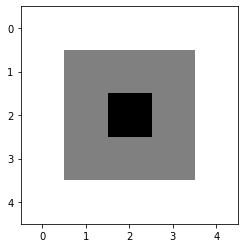

In [49]:
tchebychev = np.full((5,5), 2)
tchebychev[1:-1, 1:-1] = np.ones((3,3))
tchebychev[2, 2] = 0
print(tchebychev)
plt.imshow(tchebychev, cmap='gray'); plt.show()

## Exercice 2
Créer un histogramme des intensités dans le filtre au premier exercice.
> Utiliser `ndarray.flatten()` et `plt.hist()`

> Défi: Ajouter un titre et des *labels* sur les axes.

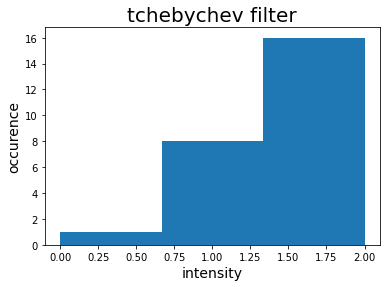

In [63]:
tchebychev_hist = tchebychev.flatten()
plt.hist(tchebychev_hist, 3)
plt.title("tchebychev filter", fontsize=20)
plt.xlabel('intensity', fontsize=14)
plt.ylabel('occurence', fontsize=14)
plt.show()

## Exercice 3
Créer un filtre linéaire 5x5 avec les distances Euclidienne à partir du centre.

<img src="distance euclidienne.PNG"
     alt="Error can't fetch img"
     style="float: left" />

[[2.83 2.24 2.   2.24 2.83]
 [2.24 1.41 1.   1.41 2.24]
 [2.   1.   0.   1.   2.  ]
 [2.24 1.41 1.   1.41 2.24]
 [2.83 2.24 2.   2.24 2.83]]


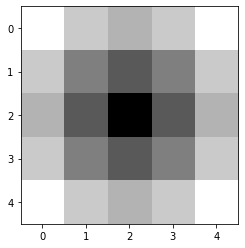

In [34]:
eucli = np.full((5, 5), -1.)

middle = eucli.shape[0] // 2

for i in range(eucli.shape[0]):
    for j in range(eucli.shape[1]):
        eucli[i, j] = ((middle - i) ** 2 + (middle - j) ** 2) ** 0.5

eucli = np.around(eucli, 2)
        
print(eucli)

plt.imshow(eucli, cmap='gray'); plt.show()

## Exercice 4
Inversé l'intensité des pixels dans le filtre euclidien au numéro précédent.

> Le résultat ressemble à un filtre Gaussien

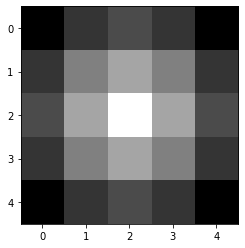

In [36]:
plt.imshow(np.max(eucli) - eucli, cmap="gray"); plt.show()

## Exercice 5
Qu'elle est la différence entre l'application d'une convolution versus une corrélation?

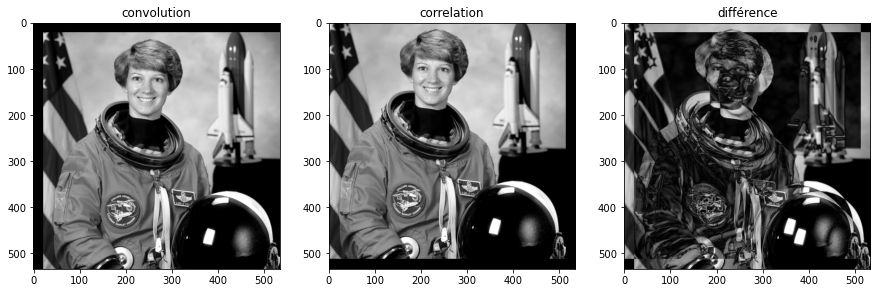

In [123]:
img = color.rgb2gray(data.astronaut())
kernel = np.array([
    [0,0,0], 
    [0,0,0], 
    [0,0,1]
])

convo = signal.convolve2d(img, kernel)
corre = signal.correlate2d(img, kernel)

for i in range(10):
    convo = signal.convolve2d(convo, kernel)

for i in range(10):
    corre = signal.correlate2d(corre, kernel)

plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title('convolution')
plt.imshow(convo, cmap='gray')

plt.subplot(132)
plt.title('correlation')
plt.imshow(corre, cmap='gray')

plt.subplot(133)
plt.title('différence')
plt.imshow(np.abs(convo - corre), cmap='gray')

plt.show()

## Exercice 6
Implémenter et appliquer un filtre médian afin de restorer l'image dans `img`.
> Compléter la section TODO

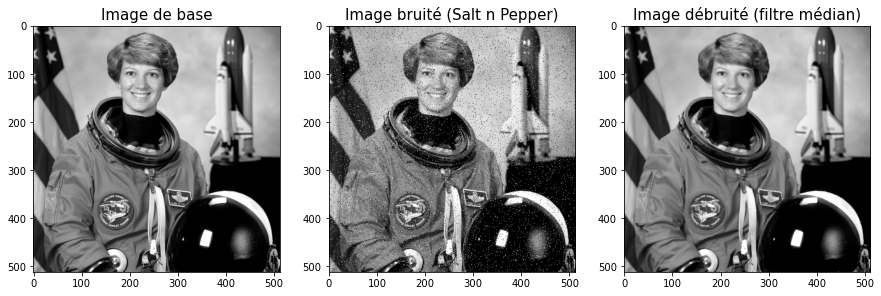

In [138]:
# Add salt and pepper noise
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title('Image de base', fontsize=15)

# Get image
img = color.rgb2gray(data.astronaut())

plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('Image bruité (Salt n Pepper)', fontsize=15)

# Add salt n pepper noise to img
nb_pixel = img.shape[0] * img.shape[1]
noise_p = 0.025

# salt
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 1

# pepper
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 0

plt.imshow(img, cmap='gray')

plt.subplot(133)
plt.title('Image débruité (filtre médian)', fontsize=15)

padding = np.zeros((img.shape[0] + 2, img.shape[1] + 2))
padding[1:-1, 1:-1] = img

# Apply median filter
for i in range(1, img.shape[0]):
    for j in range(1, img.shape[1]):
        values = padding[i-1:i+2, j-1:j+2]
        values = np.sort(values, None)
        median = values[4]
        img[i-1, j-1] = median

plt.imshow(img, cmap='gray')

plt.show()

## Exercice 7
Quiz sur différent résultat de convolution?

In [137]:
...

Ellipsis

## Extra
Pour ceux qui on de la misère à comprendre comment et pourquoi faire de l'égalisation d'histogramme:
- [Comment: vidéo youtube](https://www.youtube.com/watch?v=PD5d7EKYLcA)
- [Exemple/Pourquoi: notebook sur Github](https://github.com/MubashirullahD/diplab06/blob/master/Histogram%20Equalization.ipynb)